<a href="https://colab.research.google.com/github/chpallavi222/911-calls-/blob/main/Ecomm_Pallavi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install squarify

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import squarify
import warnings
warnings.filterwarnings('ignore')
from dateutil.parser import parse
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
df = pd.read_excel('/content/drive/MyDrive/E-com_Data.xlsx')

In [5]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN


**DATA PREPROCESSING**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          537979 non-null  object        
 2   InvoieNo           537979 non-null  int64         
 3   Date of purchase   537979 non-null  datetime64[ns]
 4   Quantity           537979 non-null  int64         
 5   Time               537979 non-null  object        
 6   price per Unit     537979 non-null  float64       
 7   Price              537979 non-null  float64       
 8   Shipping Location  537979 non-null  object        
 9   Cancelled_status   8345 non-null    float64       
 10  Reason of return   3 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 49.3+ MB


In [7]:
# Removing the column 'Sold as set' as there is no non-null values in it
df.drop('Sold as set',inplace = True, axis = 1)

In [8]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN


In [9]:
df.shape

(537979, 11)

In [10]:
notnull_values = pd.notnull(df['Reason of return'])
df[notnull_values]

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return
411295,NaN,14105,390366,2017-09-05,-156,12:16:00,34.0,-5304.0,Location 36,NaN,display
411455,NaN,72807C,403542,2017-11-26,-428,12:45:00,7.0,-2996.0,Location 36,NaN,Missing
411612,NaN,72807B,403540,2017-11-29,-124,12:45:00,15.0,-1860.0,Location 36,NaN,Missing


In [11]:

df.dropna(subset = ['CustomerID'],inplace =True)

In [12]:
df.shape

(404189, 11)

In [13]:
df.drop('Reason of return',inplace = True,axis = 1)

In [14]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN


In [15]:
df['Cancelled_status'] = df['Cancelled_status'].replace(np.nan, 0)
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,0.0
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,0.0
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,0.0
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,0.0
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,0.0


In [16]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,0.0
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,0.0
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,0.0
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,0.0
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,0.0


In [17]:
df.dtypes

CustomerID                  float64
Item Code                    object
InvoieNo                      int64
Date of purchase     datetime64[ns]
Quantity                      int64
Time                         object
price per Unit              float64
Price                       float64
Shipping Location            object
Cancelled_status            float64
dtype: object

In [18]:
#Converting datatype of CustomerID from float to integer type
df['CustomerID'] = df['CustomerID'].astype(int)

In [19]:
# Merging Date of purchase column and Time Column
df['DateTime'] = (df['Date of purchase']).astype(str) +" " +(df['Time']).astype(str)

In [20]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,DateTime
0,4355,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,0.0,2017-10-29 15:36:00
1,4352,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,0.0,2017-10-05 14:53:00
2,4352,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,0.0,2017-10-12 14:53:00
3,4352,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,0.0,2017-08-22 14:47:00
4,4352,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,0.0,2017-10-10 14:53:00


In [21]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [22]:
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Weekday'] = df['DateTime'].dt.day_name()
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute


**EXPLORATORY DATA ANALYSIS**

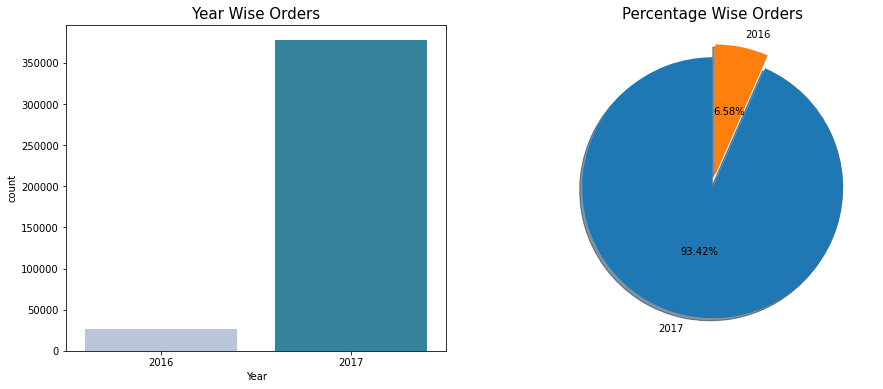

In [23]:
# Yearly order counts.
plt.rcParams['figure.figsize'] = (15,6) 

plt.subplot(1,2,1)
sns.countplot(df['Year'],data = df,palette = 'PuBuGn')
plt.title('Year Wise Orders',fontsize= 15)

plt.subplot(1,2,2)
df['Year'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['2017','2016'], shadow = True, pctdistance = 0.5)
plt.title('Percentage Wise Orders',fontsize= 15)
plt.axis('off')
plt.show()

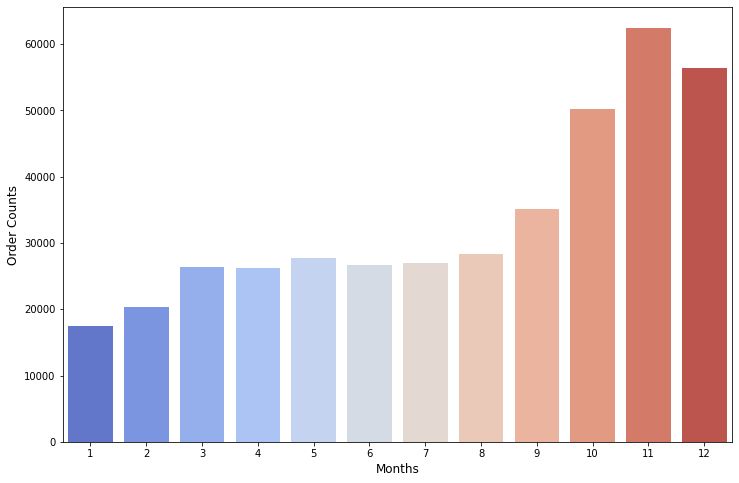

In [24]:
# Month wise Orders

plt.rcParams['figure.figsize'] = (12,8)
sns.countplot(df['Month'],data = df,palette= 'coolwarm')
plt.xlabel('Months',fontsize = 12)
plt.ylabel('Order Counts',fontsize = 12)
plt.show()

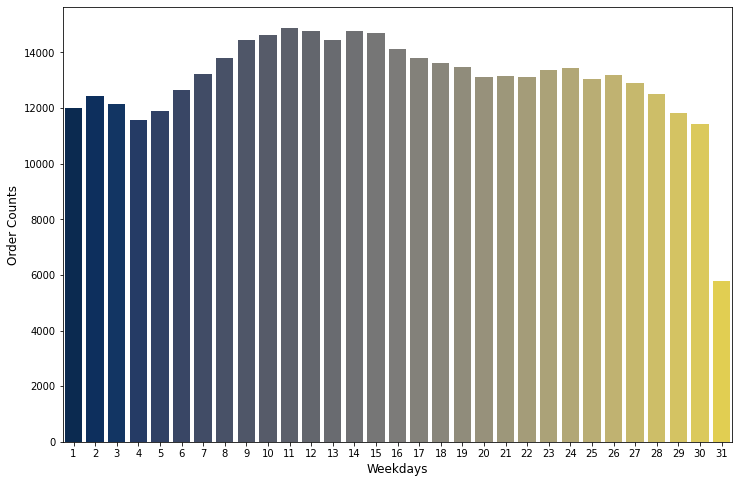

In [25]:
# Orders per Date of Month
plt.rcParams['figure.figsize'] = (12,8)
sns.countplot(df['Day'],data = df,palette= 'cividis')
plt.xlabel('Weekdays',fontsize = 12)
plt.ylabel('Order Counts',fontsize = 12)
plt.show()

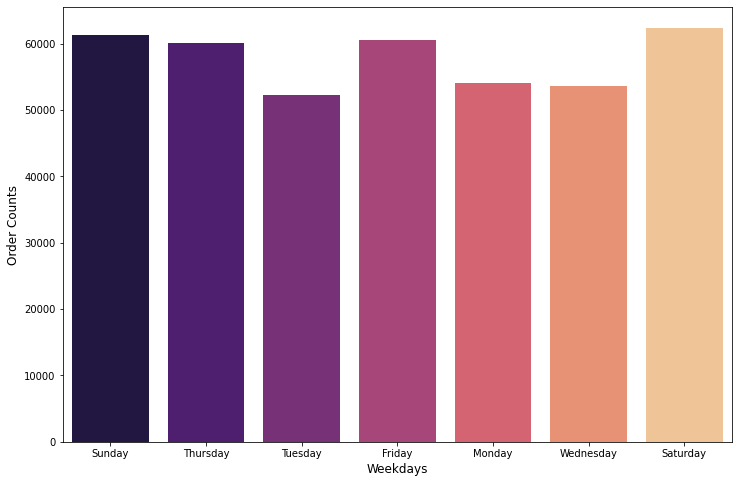

In [26]:
# Orders per day of week
plt.rcParams['figure.figsize'] = (12,8)
sns.countplot(df['Weekday'],data = df,palette= 'magma')
plt.xlabel('Weekdays',fontsize = 12)
plt.ylabel('Order Counts',fontsize = 12)
plt.show()

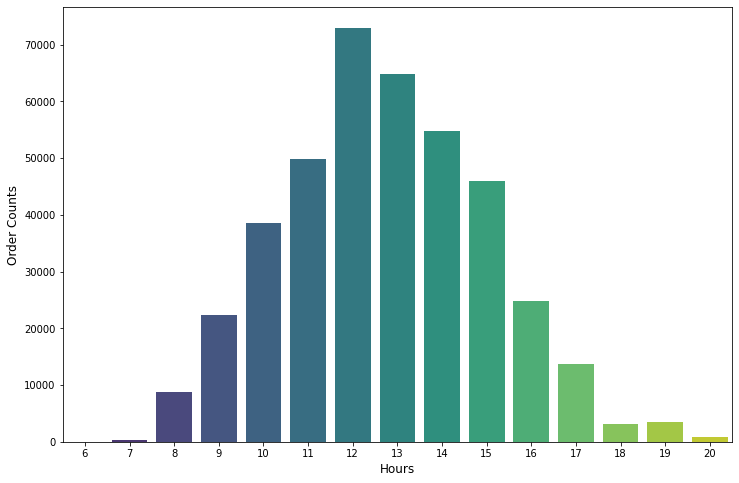

In [27]:
# Orders per hour
plt.rcParams['figure.figsize'] = (12,8)
sns.countplot(df['Hour'],data = df,palette= 'viridis')
plt.xlabel('Hours',fontsize = 12)
plt.ylabel('Order Counts',fontsize = 12)
plt.show()

In [28]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,DateTime,Year,Month,Day,Weekday,Hour,Minute
0,4355,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,0.0,2017-10-29 15:36:00,2017,10,29,Sunday,15,36
1,4352,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,0.0,2017-10-05 14:53:00,2017,10,5,Thursday,14,53
2,4352,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,0.0,2017-10-12 14:53:00,2017,10,12,Thursday,14,53
3,4352,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,0.0,2017-08-22 14:47:00,2017,8,22,Tuesday,14,47
4,4352,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,0.0,2017-10-10 14:53:00,2017,10,10,Tuesday,14,53


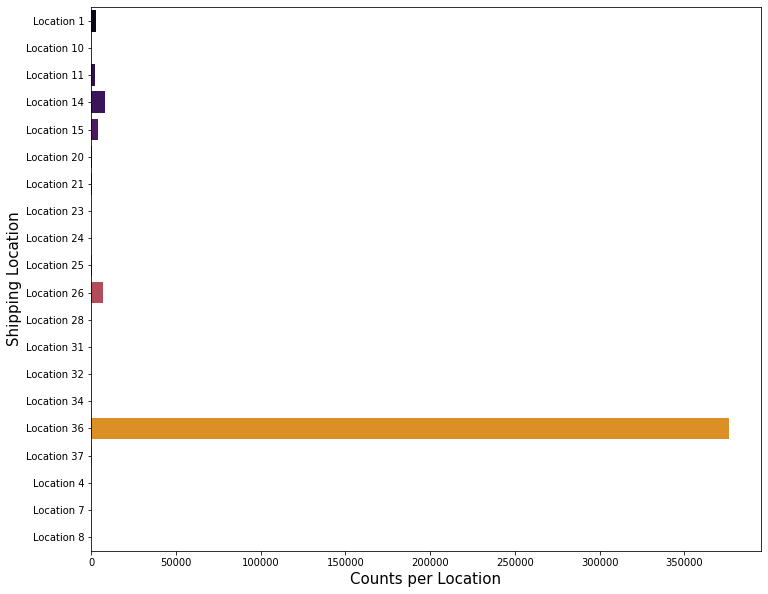

In [29]:
plt.rcParams['figure.figsize'] = (12,10)
sns.countplot(y = df['Shipping Location'],data = df,palette = 'inferno')
plt.xlabel('Counts per Location',fontsize = 15)
plt.ylabel('Shipping Location',fontsize = 15)
plt.show()

**Most of the orders are done for the Location 36**

In [30]:
#Creating new dataframe for location 36
df_loc36 = df[df['Shipping Location'] == 'Location 36']


In [31]:
df_loc36.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,DateTime,Year,Month,Day,Weekday,Hour,Minute
34831,4372,39845,395779,2017-10-14,24,10:23:00,45.0,1080.0,Location 36,0.0,2017-10-14 10:23:00,2017,10,14,Saturday,10,23
34832,4372,15178,379129,2017-06-01,12,10:39:00,92.0,1104.0,Location 36,0.0,2017-06-01 10:39:00,2017,6,1,Thursday,10,39
34833,4372,15177,379129,2017-05-25,12,10:39:00,98.0,1176.0,Location 36,0.0,2017-05-25 10:39:00,2017,5,25,Thursday,10,39
34834,4372,14844,395779,2017-10-17,12,10:23:00,106.0,1272.0,Location 36,0.0,2017-10-17 10:23:00,2017,10,17,Tuesday,10,23
34835,4372,15801,395779,2017-10-15,24,10:23:00,53.0,1272.0,Location 36,0.0,2017-10-15 10:23:00,2017,10,15,Sunday,10,23


In [32]:
df_loc36.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376353 entries, 34831 to 411183
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         376353 non-null  int64         
 1   Item Code          376353 non-null  object        
 2   InvoieNo           376353 non-null  int64         
 3   Date of purchase   376353 non-null  datetime64[ns]
 4   Quantity           376353 non-null  int64         
 5   Time               376353 non-null  object        
 6   price per Unit     376353 non-null  float64       
 7   Price              376353 non-null  float64       
 8   Shipping Location  376353 non-null  object        
 9   Cancelled_status   376353 non-null  float64       
 10  DateTime           376353 non-null  datetime64[ns]
 11  Year               376353 non-null  int64         
 12  Month              376353 non-null  int64         
 13  Day                376353 non-null  int6

In [33]:
df_loc36.drop(['Year','Month','Day','Weekday','Hour','Minute','Date of purchase','Time','Shipping Location'],axis = 1,inplace = True)

In [34]:
df_loc36.reset_index()

,index,CustomerID,Item Code,InvoieNo,Quantity,price per Unit,Price,Cancelled_status,DateTime
0,34831,4372,39845,395779,24,45.0,1080.0,0.0,2017-10-14 10:23:00
1,34832,4372,15178,379129,12,92.0,1104.0,0.0,2017-06-01 10:39:00
2,34833,4372,15177,379129,12,98.0,1176.0,0.0,2017-05-25 10:39:00
3,34834,4372,14844,395779,12,106.0,1272.0,0.0,2017-10-17 10:23:00
4,34835,4372,15801,395779,24,53.0,1272.0,0.0,2017-10-15 10:23:00
...,...,...,...,...,...,...,...,...,...
376348,411179,2,15507,398575,48,202.0,9696.0,0.0,2017-11-10 12:25:00
376349,411180,2,15739,387096,12,868.0,10416.0,0.0,2017-08-05 08:48:00
376350,411181,2,84558A,387096,36,306.0,11016.0,0.0,2017-08-05 08:48:00
376351,411182,2,84558A,398575,36,346.0,12456.0,0.0,2017-11-04 12:25:00


In [35]:
df_loc36.describe()

,CustomerID,InvoieNo,Quantity,price per Unit,Price,Cancelled_status
count,376353.000000,376353.000000,376353.000000,376353.000000,376353.000000,376353.000000
mean,2188.846756,385666.911009,11.336995,341.776495,2462.096729,0.019971
std,1249.629719,13085.329557,28.861827,426.729007,4842.747325,0.139899
min,2.000000,361429.000000,-152.000000,2.000000,-10104.000000,0.000000
25%,1217.000000,374321.000000,2.000000,158.000000,553.000000,0.000000
50%,2080.000000,386933.000000,5.000000,238.000000,1564.000000,0.000000
75%,3294.000000,397130.000000,12.000000,410.000000,2480.000000,0.000000
max,4372.000000,406651.000000,3186.000000,64973.000000,90400.000000,1.000000


In [36]:
df_loc36.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376353 entries, 34831 to 411183
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   CustomerID        376353 non-null  int64         
 1   Item Code         376353 non-null  object        
 2   InvoieNo          376353 non-null  int64         
 3   Quantity          376353 non-null  int64         
 4   price per Unit    376353 non-null  float64       
 5   Price             376353 non-null  float64       
 6   Cancelled_status  376353 non-null  float64       
 7   DateTime          376353 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 25.8+ MB


In [37]:
df_loc36.head()

,CustomerID,Item Code,InvoieNo,Quantity,price per Unit,Price,Cancelled_status,DateTime
34831,4372,39845,395779,24,45.0,1080.0,0.0,2017-10-14 10:23:00
34832,4372,15178,379129,12,92.0,1104.0,0.0,2017-06-01 10:39:00
34833,4372,15177,379129,12,98.0,1176.0,0.0,2017-05-25 10:39:00
34834,4372,14844,395779,12,106.0,1272.0,0.0,2017-10-17 10:23:00
34835,4372,15801,395779,24,53.0,1272.0,0.0,2017-10-15 10:23:00


In [38]:
df_loc36[df_loc36['CustomerID'] == 2]

,CustomerID,Item Code,InvoieNo,Quantity,price per Unit,Price,Cancelled_status,DateTime
411035,2,8431,374286,24,26.0,624.0,0.0,2017-04-17 10:43:00
411036,2,15244,374286,12,66.0,792.0,0.0,2017-04-13 10:43:00
411037,2,13142,387096,10,99.0,990.0,0.0,2017-08-11 08:48:00
411038,2,15368,398575,12,95.0,1140.0,0.0,2017-11-06 12:25:00
411039,2,14059,398575,12,96.0,1152.0,0.0,2017-11-08 12:25:00
...,...,...,...,...,...,...,...,...
411179,2,15507,398575,48,202.0,9696.0,0.0,2017-11-10 12:25:00
411180,2,15739,387096,12,868.0,10416.0,0.0,2017-08-05 08:48:00
411181,2,84558A,387096,36,306.0,11016.0,0.0,2017-08-05 08:48:00
411182,2,84558A,398575,36,346.0,12456.0,0.0,2017-11-04 12:25:00


## **RFM** **Analysis**

In [39]:
# New columns Recency,Frequency and Monetary.
max_date = df_loc36['DateTime'].max()
max_date

Timestamp('2017-12-19 12:50:00')

In [40]:
current_date = dt.datetime(2017,12,20)


In [41]:
rfm = df_loc36.groupby('CustomerID').agg({'DateTime': lambda date : (current_date - date.max()).days,
                                      'InvoieNo' : lambda x : x.count(),
                                      'Price' : lambda price : price.sum()}).reset_index()

rfm.columns  = ['CustomerID','Recency' , 'Frequency', 'Monetary']


rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,2,3,149,459974.0
1,3,76,24,218956.0
2,4,18,64,158562.0
3,5,310,16,41976.0
4,6,36,79,144226.0


**Checking Distribution of the new dataframe RFM**

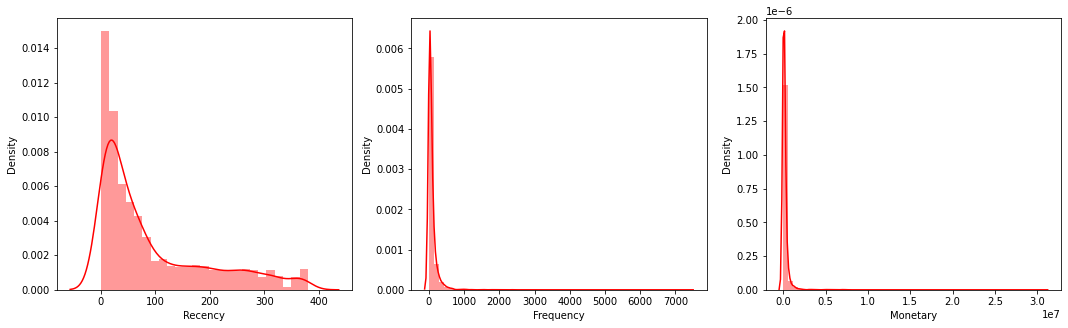

In [42]:

plt.rcParams['figure.figsize'] = (18,5)

plt.subplot(1,3,1)
sns.distplot(rfm['Recency'] ,color = 'red')


plt.subplot(1,3,2)
sns.distplot(rfm['Frequency'] ,color = 'red')

plt.subplot(1,3,3)
sns.distplot(rfm['Monetary'] ,color = 'red')


plt.show()

In [43]:
# Checking the quantiles for each RFM Column.
quantile = rfm.quantile( q = [0.25,0.50,0.75])
quantile

,CustomerID,Recency,Frequency,Monetary
0.25,1094.5,17.0,16.0,35235.0
0.50,2185.0,50.0,39.0,78260.0
0.75,3278.5,143.5,95.0,193223.5


In [44]:
R_score = []
for x in rfm['Recency']:
  if x <= rfm['Recency'].quantile(q = 0.25):
    R_score.append(4)
  elif x <= rfm['Recency'].quantile(q = 0.50):
    R_score.append(3)
  elif x <= rfm['Recency'].quantile(q = 0.75):
    R_score.append(2)
  else:
    R_score.append(1)

rfm['R_score'] = R_score  

F_score = []
for x in rfm['Frequency']:
  if x <= rfm['Frequency'].quantile(q = 0.25):
    F_score.append(1)
  elif x <= rfm['Frequency'].quantile(q = 0.50):
    F_score.append(2)
  elif x <= rfm['Frequency'].quantile(q = 0.75):
    F_score.append(3)
  else:
    F_score.append(4)
rfm['F_score'] = F_score  

M_score = []
for x in rfm['Monetary']:
  if x <= rfm['Monetary'].quantile(q = 0.25):
    M_score.append(1)
  elif x <= rfm['Monetary'].quantile(q = 0.50):
    M_score.append(2)
  elif x <= rfm['Monetary'].quantile(q = 0.75):
    M_score.append(3)
  else:
    M_score.append(4)
rfm['M_score'] = M_score  
rfm['RFM_Score'] = rfm['R_score'].astype(str)+rfm['F_score'].astype(str)+rfm['M_score'].astype(str)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
0,2,3,149,459974.0,4,4,4,444
1,3,76,24,218956.0,2,2,4,224
2,4,18,64,158562.0,3,3,3,333
3,5,310,16,41976.0,1,1,2,112
4,6,36,79,144226.0,3,3,3,333


In [45]:
rfm.shape

(4347, 8)

**Calculating Purchase Power **

In [46]:
ratio = df_loc36.groupby('CustomerID').agg({'Cancelled_status': lambda x: x.sum()})
ratio.columns

Index(['Cancelled_status'], dtype='object')

In [47]:
ratio.reset_index()
ratio.columns = ['ReturnedOrder']

In [48]:
ratio.rename_axis('CustomerID').reset_index()

,CustomerID,ReturnedOrder
0,2,0.0
1,3,0.0
2,4,0.0
3,5,0.0
4,6,6.0
...,...,...
4342,4368,0.0
4343,4369,0.0
4344,4370,0.0
4345,4371,0.0


In [49]:
new_data = rfm.set_index('CustomerID').combine_first(ratio)
new_data.head()

,F_score,Frequency,M_score,Monetary,RFM_Score,R_score,Recency,ReturnedOrder
CustomerID,,,,,,,,
2,4,149,4,459974.0,444,4,3,0.0
3,2,24,4,218956.0,224,2,76,0.0
4,3,64,3,158562.0,333,3,18,0.0
5,1,16,2,41976.0,112,1,310,0.0
6,3,79,3,144226.0,333,3,36,6.0


In [50]:
new_data['NoReturns'] = new_data['Frequency'] - new_data['ReturnedOrder']
new_data.head()

,F_score,Frequency,M_score,Monetary,RFM_Score,R_score,Recency,ReturnedOrder,NoReturns
CustomerID,,,,,,,,,
2,4,149,4,459974.0,444,4,3,0.0,149.0
3,2,24,4,218956.0,224,2,76,0.0,24.0
4,3,64,3,158562.0,333,3,18,0.0,64.0
5,1,16,2,41976.0,112,1,310,0.0,16.0
6,3,79,3,144226.0,333,3,36,6.0,73.0


In [51]:
new_data['Purchase_power_ratio'] = round((new_data['NoReturns']/new_data['Frequency']),2)
new_data

,F_score,Frequency,M_score,Monetary,RFM_Score,R_score,Recency,ReturnedOrder,NoReturns,Purchase_power_ratio
CustomerID,,,,,,,,,,
2,4,149,4,459974.0,444,4,3,0.0,149.0,1.00
3,2,24,4,218956.0,224,2,76,0.0,24.0,1.00
4,3,64,3,158562.0,333,3,18,0.0,64.0,1.00
5,1,16,2,41976.0,112,1,310,0.0,16.0,1.00
6,3,79,3,144226.0,333,3,36,6.0,73.0,0.92
...,...,...,...,...,...,...,...,...,...,...
4368,1,9,1,18916.0,111,1,277,0.0,9.0,1.00
4369,1,7,1,10774.0,111,1,180,0.0,7.0,1.00
4370,1,11,1,19465.0,411,4,8,0.0,11.0,1.00


In [52]:
PP_score = []
for x in new_data['Purchase_power_ratio']:
  if x == 1.00:
    PP_score.append(4)
  elif ((x>=0.97) & (x<1.00)):
    PP_score.append(3)
  elif ((x>=0.80) & (x<0.97)):
    PP_score.append(2)
  else:
    PP_score.append(1)

new_data['PP_score']=PP_score

In [53]:
new_data.head()

,F_score,Frequency,M_score,Monetary,RFM_Score,R_score,Recency,ReturnedOrder,NoReturns,Purchase_power_ratio,PP_score
CustomerID,,,,,,,,,,,
2,4,149,4,459974.0,444,4,3,0.0,149.0,1.00,4
3,2,24,4,218956.0,224,2,76,0.0,24.0,1.00,4
4,3,64,3,158562.0,333,3,18,0.0,64.0,1.00,4
5,1,16,2,41976.0,112,1,310,0.0,16.0,1.00,4
6,3,79,3,144226.0,333,3,36,6.0,73.0,0.92,2


In [54]:
new_data.describe()

,F_score,Frequency,M_score,Monetary,R_score,Recency,ReturnedOrder,NoReturns,Purchase_power_ratio,PP_score
count,4347.000000,4347.000000,4347.000000,4.347000e+03,4347.000000,4347.000000,4347.000000,4347.000000,4347.000000,4347.000000
mean,2.487003,86.577640,2.499885,2.131625e+05,2.508167,92.505176,1.729009,84.848631,0.973313,3.481481
std,1.122093,215.565898,1.118265,7.729048e+05,1.125210,100.829325,6.389576,211.834371,0.092694,0.825734
min,1.000000,1.000000,1.000000,-4.442600e+04,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,16.000000,1.500000,3.523500e+04,1.500000,17.000000,0.000000,16.000000,0.980000,3.000000
50%,2.000000,39.000000,2.000000,7.826000e+04,3.000000,50.000000,0.000000,38.000000,1.000000,4.000000
75%,3.000000,95.000000,3.500000,1.932235e+05,4.000000,143.500000,1.000000,93.000000,1.000000,4.000000
max,4.000000,7383.000000,4.000000,3.077583e+07,4.000000,380.000000,186.000000,7259.000000,1.000000,4.000000


In [55]:
new_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4347 entries, 2 to 4372
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   F_score               4347 non-null   int64  
 1   Frequency             4347 non-null   int64  
 2   M_score               4347 non-null   int64  
 3   Monetary              4347 non-null   float64
 4   RFM_Score             4347 non-null   object 
 5   R_score               4347 non-null   int64  
 6   Recency               4347 non-null   int64  
 7   ReturnedOrder         4347 non-null   float64
 8   NoReturns             4347 non-null   float64
 9   Purchase_power_ratio  4347 non-null   float64
 10  PP_score              4347 non-null   int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 407.5+ KB


In [56]:
new_data.drop(['ReturnedOrder'],axis =1,inplace = True)
new_data.head()

,F_score,Frequency,M_score,Monetary,RFM_Score,R_score,Recency,NoReturns,Purchase_power_ratio,PP_score
CustomerID,,,,,,,,,,
2,4,149,4,459974.0,444,4,3,149.0,1.00,4
3,2,24,4,218956.0,224,2,76,24.0,1.00,4
4,3,64,3,158562.0,333,3,18,64.0,1.00,4
5,1,16,2,41976.0,112,1,310,16.0,1.00,4
6,3,79,3,144226.0,333,3,36,73.0,0.92,2


In [57]:
new_data['Cust_Score'] = new_data['R_score'] + new_data['F_score'] + new_data['M_score'] + new_data['PP_score']

In [58]:
new_data.head()

,F_score,Frequency,M_score,Monetary,RFM_Score,R_score,Recency,NoReturns,Purchase_power_ratio,PP_score,Cust_Score
CustomerID,,,,,,,,,,,
2,4,149,4,459974.0,444,4,3,149.0,1.00,4,16
3,2,24,4,218956.0,224,2,76,24.0,1.00,4,12
4,3,64,3,158562.0,333,3,18,64.0,1.00,4,13
5,1,16,2,41976.0,112,1,310,16.0,1.00,4,8
6,3,79,3,144226.0,333,3,36,73.0,0.92,2,11


In [59]:
new_data.describe()

,F_score,Frequency,M_score,Monetary,R_score,Recency,NoReturns,Purchase_power_ratio,PP_score,Cust_Score
count,4347.000000,4347.000000,4347.000000,4.347000e+03,4347.000000,4347.000000,4347.000000,4347.000000,4347.000000,4347.000000
mean,2.487003,86.577640,2.499885,2.131625e+05,2.508167,92.505176,84.848631,0.973313,3.481481,10.976536
std,1.122093,215.565898,1.118265,7.729048e+05,1.125210,100.829325,211.834371,0.092694,0.825734,2.788346
min,1.000000,1.000000,1.000000,-4.442600e+04,1.000000,0.000000,0.000000,0.000000,1.000000,4.000000
25%,1.000000,16.000000,1.500000,3.523500e+04,1.500000,17.000000,16.000000,0.980000,3.000000,9.000000
50%,2.000000,39.000000,2.000000,7.826000e+04,3.000000,50.000000,38.000000,1.000000,4.000000,11.000000
75%,3.000000,95.000000,3.500000,1.932235e+05,4.000000,143.500000,93.000000,1.000000,4.000000,13.000000
max,4.000000,7383.000000,4.000000,3.077583e+07,4.000000,380.000000,7259.000000,1.000000,4.000000,16.000000


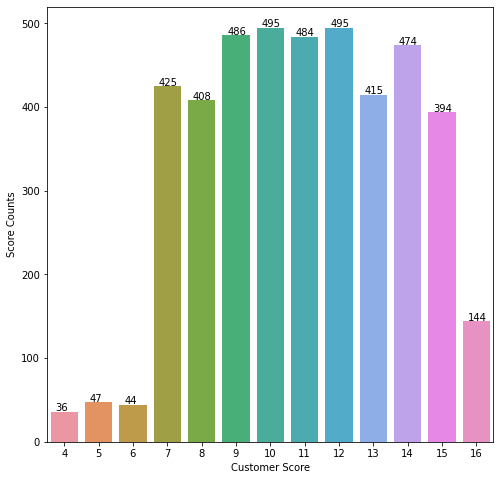

In [60]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x=new_data['Cust_Score'], data=new_data)
plt.title("")
plt.xlabel('Customer Score')
plt.ylabel('Score Counts')
for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

In [61]:
def cc_level(new_data):
    if new_data['Cust_Score'] >= 15:
        return 'Can\'t Loose Them'
    elif ((new_data['Cust_Score'] >= 14) and (new_data['Cust_Score'] < 15)):
        return 'Champions'
    elif ((new_data['Cust_Score'] >= 13) and (new_data['Cust_Score'] < 14)):
        return 'Loyal'
    elif ((new_data['Cust_Score'] >= 12) and (new_data['Cust_Score'] < 13)):
        return 'Highly Active'
    elif ((new_data['Cust_Score'] >= 11) and (new_data['Cust_Score'] < 12)):
        return 'Potential'
    elif ((new_data['Cust_Score'] >= 10) and (new_data['Cust_Score'] < 11)):
        return 'Good Interest'
    elif ((new_data['Cust_Score'] >= 9) and (new_data['Cust_Score'] < 10)):
        return 'Occassional Spendor'
    elif ((new_data['Cust_Score'] >= 8) and (new_data['Cust_Score'] < 9)):
        return 'Poorly Active'
    elif ((new_data['Cust_Score'] >= 7) and (new_data['Cust_Score'] < 8)):
        return 'Needs Attention'                            
    else:
        return 'Require Activation'

In [62]:
new_data['Customer_Category'] = new_data.apply(cc_level,axis =1)

In [63]:
new_data.reset_index()

,CustomerID,F_score,Frequency,M_score,Monetary,RFM_Score,R_score,Recency,NoReturns,Purchase_power_ratio,PP_score,Cust_Score,Customer_Category
0,2,4,149,4,459974.0,444,4,3,149.0,1.00,4,16,Can't Loose Them
1,3,2,24,4,218956.0,224,2,76,24.0,1.00,4,12,Highly Active
2,4,3,64,3,158562.0,333,3,18,64.0,1.00,4,13,Loyal
3,5,1,16,2,41976.0,112,1,310,16.0,1.00,4,8,Poorly Active
4,6,3,79,3,144226.0,333,3,36,73.0,0.92,2,11,Potential
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4342,4368,1,9,1,18916.0,111,1,277,9.0,1.00,4,7,Needs Attention
4343,4369,1,7,1,10774.0,111,1,180,7.0,1.00,4,7,Needs Attention
4344,4370,1,11,1,19465.0,411,4,8,11.0,1.00,4,10,Good Interest
4345,4371,4,687,4,259701.0,444,4,3,687.0,1.00,4,16,Can't Loose Them


In [64]:
cc_level_agg = new_data.groupby('Customer_Category').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'NoReturns': ['mean', 'count']
}).round(1)

In [65]:
cc_level_agg

Recency Frequency  Monetary NoReturns      
                       mean      mean      mean      mean count
Customer_Category                                              
Can't Loose Them       10.8     308.3  733588.1     305.4   538
Champions              22.7     163.0  455799.3     158.5   474
Good Interest          92.1      31.8   66810.8      31.0   495
Highly Active          54.3      64.4  146621.9      63.0   495
Loyal                  35.8      99.0  262620.5      96.3   415
Needs Attention       249.0      10.0   24553.6       9.6   425
Occassional Spendor   133.3      21.3   48962.8      20.8   486
Poorly Active         153.5      15.6   33984.9      14.9   408
Potential              74.6      45.7  105119.5      44.6   484
Require Activation    227.6      11.2   18005.6       8.3   127

In [66]:
cc_level_agg.columns = cc_level_agg.columns.droplevel()
cc_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean','NoReturnsMean','Count']

In [67]:
cc_level_agg

,RecencyMean,FrequencyMean,MonetaryMean,NoReturnsMean,Count
Customer_Category,,,,,
Can't Loose Them,10.8,308.3,733588.1,305.4,538
Champions,22.7,163.0,455799.3,158.5,474
Good Interest,92.1,31.8,66810.8,31.0,495
Highly Active,54.3,64.4,146621.9,63.0,495
Loyal,35.8,99.0,262620.5,96.3,415
Needs Attention,249.0,10.0,24553.6,9.6,425
Occassional Spendor,133.3,21.3,48962.8,20.8,486
Poorly Active,153.5,15.6,33984.9,14.9,408
Potential,74.6,45.7,105119.5,44.6,484


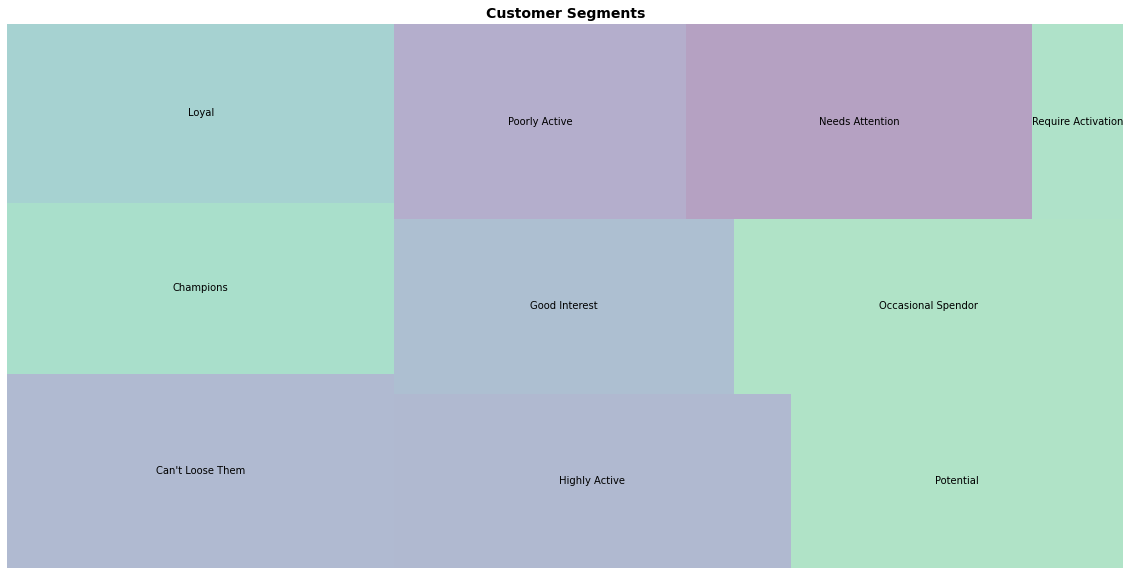

In [68]:
import squarify

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20,10)
squarify.plot(sizes=cc_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Highly Active',
                     'Potential',
                     'Good Interest',
                     'Occasional Spendor',
                     'Poorly Active',
                     'Needs Attention',
                     'Require Activation'], alpha=.4 )
plt.title("Customer Segments",fontsize=14,fontweight="bold")
plt.axis('off')
plt.show()

In [69]:
final_df = new_data.drop(['Customer_Category'],axis =1)
final_df.head()

,F_score,Frequency,M_score,Monetary,RFM_Score,R_score,Recency,NoReturns,Purchase_power_ratio,PP_score,Cust_Score
CustomerID,,,,,,,,,,,
2,4,149,4,459974.0,444,4,3,149.0,1.00,4,16
3,2,24,4,218956.0,224,2,76,24.0,1.00,4,12
4,3,64,3,158562.0,333,3,18,64.0,1.00,4,13
5,1,16,2,41976.0,112,1,310,16.0,1.00,4,8
6,3,79,3,144226.0,333,3,36,73.0,0.92,2,11


In [70]:
final_df.columns

Index(['F_score', 'Frequency', 'M_score', 'Monetary', 'RFM_Score', 'R_score',
       'Recency', 'NoReturns', 'Purchase_power_ratio', 'PP_score',
       'Cust_Score'],
      dtype='object')

**Standardising Data**

In [71]:

scaler = StandardScaler()
data_scaled = scaler.fit_transform(final_df)
data_scaled = pd.DataFrame(data_scaled)
data_scaled.reset_index
data_scaled.columns = ['F_score', 'Frequency', 'M_score', 'Monetary', 'RFM_Score', 'R_score',
       'Recency', 'NoReturns', 'Purchase_power_ratio', 'PP_score',
       'Cust_Score']
data_scaled = data_scaled.round(decimals = 2)
data_scaled.head()

,F_score,Frequency,M_score,Monetary,RFM_Score,R_score,Recency,NoReturns,Purchase_power_ratio,PP_score,Cust_Score
0,1.35,0.29,1.34,0.32,1.40,1.33,-0.89,0.30,0.29,0.63,1.80
1,-0.43,-0.29,1.34,0.01,-0.46,-0.45,-0.16,-0.29,0.29,0.63,0.37
2,0.46,-0.10,0.45,-0.07,0.46,0.44,-0.74,-0.10,0.29,0.63,0.73
3,-1.33,-0.33,-0.45,-0.22,-1.40,-1.34,2.16,-0.33,0.29,0.63,-1.07
4,0.46,-0.04,0.45,-0.09,0.46,0.44,-0.56,-0.06,-0.58,-1.79,0.01


**KMeans on Data Scaled**

In [72]:
km = KMeans(n_clusters = 6,random_state= 0 )
km.fit(data_scaled)
pred = km.predict(data_scaled)
km.inertia_
labels = km.labels_


In [73]:
# Calculating Inertia for a range 1 -30 so that we can plot Elbow plot to figure out which is the best no of cluster
inertia = []
for i in range(1,31):
  Km = KMeans(n_clusters= i)
  Km.fit(data_scaled)
  inertia.append(Km.inertia_)

***Elbow Plot for standardized data***

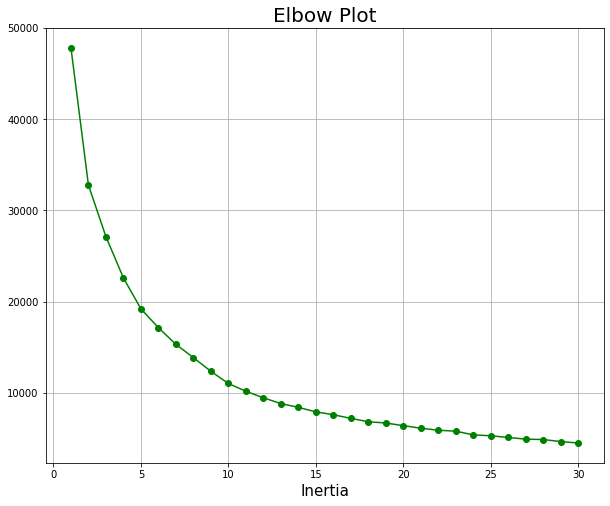

In [74]:
frame = pd.DataFrame({'Clusters':range(1,31),'Inertia':inertia})

plt.rcParams['figure.figsize'] = (10,8)
plt.grid()
plt.plot(frame['Clusters'],frame['Inertia'],marker = 'o',color = 'green')
plt.xlabel('No of Cluster',fontsize = 15)
plt.xlabel('Inertia',fontsize = 15)
plt.title('Elbow Plot',fontsize = 20)
plt.show()

According to Elbow Table best no of cluster is 5.6.7

**Normalising Data**

In [75]:
from sklearn.preprocessing import normalize

norm = normalize(data_scaled)
data_norm = pd.DataFrame(norm)

**KMeans on Normalised data**

In [76]:

km = KMeans(n_clusters = 3,random_state= 0 )
km.fit(data_norm)
pred = km.predict(data_norm)
km.inertia_
km.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int32)

In [77]:
inertia = []
for i in range(1,31):
  Km = KMeans(n_clusters= i)
  Km.fit(data_norm)
  inertia.append(Km.inertia_)

***Elbow Plot for normalized data***

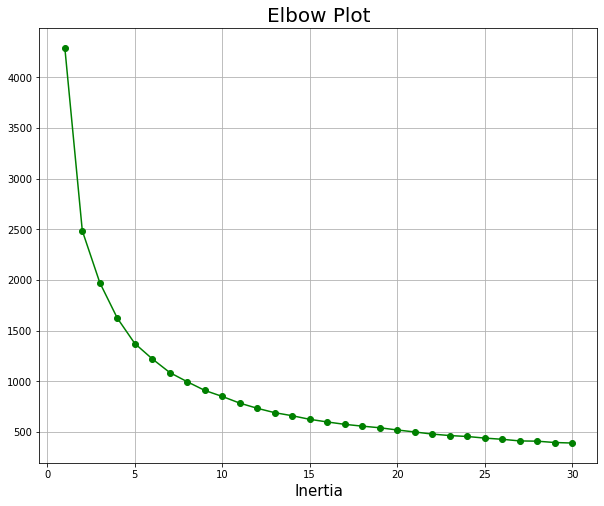

In [78]:
frame = pd.DataFrame({'Clusters':range(1,31),'Inertia':inertia})

plt.rcParams['figure.figsize'] = (10,8)
plt.grid()
plt.plot(frame['Clusters'],frame['Inertia'],marker = 'o',color = 'green')
plt.xlabel('No of Cluster',fontsize = 15)
plt.xlabel('Inertia',fontsize = 15)
plt.title('Elbow Plot',fontsize = 20)
plt.show()

**(1) KMeans Clustering**

In [79]:
for i in range(2,9):
  km = KMeans(n_clusters = i,random_state= 123 )
  km.fit(data_norm)
  label = km.labels_
  Silhouette_score = metrics.silhouette_score(data_norm,label, metric='euclidean').round(decimals = 2)
  print("\nFor Cluster no:", i)
  print("Silhouette_score :   ",Silhouette_score)
  print("Davies_bouldin_score :",davies_bouldin_score(data_norm,label).round(decimals = 3))


For Cluster no: 2
Silhouette_score :    0.39
Davies_bouldin_score : 1.101

For Cluster no: 3
Silhouette_score :    0.35
Davies_bouldin_score : 1.131

For Cluster no: 4
Silhouette_score :    0.36
Davies_bouldin_score : 1.066

For Cluster no: 5
Silhouette_score :    0.37
Davies_bouldin_score : 1.052

For Cluster no: 6
Silhouette_score :    0.34
Davies_bouldin_score : 1.098

For Cluster no: 7
Silhouette_score :    0.32
Davies_bouldin_score : 1.149

For Cluster no: 8
Silhouette_score :    0.31
Davies_bouldin_score : 1.166


**Best Cluster No Acc to Kmeans is 5:**
For Cluster no: 5
Silhouette_score :    0.37
Davies_bouldin_score : 1.052

**(2) DBSCAN Clustering**

In [80]:
for i in range(1,6):
  model = DBSCAN(eps = i)
  DB = model.fit(data_scaled)
  cluster_db= DB.labels_
  print("\nFor EPS:", i)
  print('Silhouette Score :' , silhouette_score(data_scaled,cluster_db).round(3))
  print('Davies_bouldin_Score :', davies_bouldin_score(data_scaled,cluster_db).round(3))



For EPS: 1
Silhouette Score : 0.113
Davies_bouldin_Score : 1.756

For EPS: 2
Silhouette Score : 0.53
Davies_bouldin_Score : 1.097

For EPS: 3
Silhouette Score : 0.692
Davies_bouldin_Score : 0.742

For EPS: 4
Silhouette Score : 0.845
Davies_bouldin_Score : 0.793

For EPS: 5
Silhouette Score : 0.854
Davies_bouldin_Score : 0.736


**(3) MiniBatchKMeans Clustering**

In [81]:
for i in range(3,9):
  mbk = MiniBatchKMeans(n_clusters = i,init = 'k-means++',random_state=123)
  mbk.fit(data_norm)
  mbk.labels = mbk.labels_
  print("\nFor Cluster no:",i)
  print('Silhouette Score :' , silhouette_score(data_norm,mbk.labels).round(3))
  print('Davies_bouldin_Score :', davies_bouldin_score(data_norm,mbk.labels).round(3))
  


For Cluster no: 3
Silhouette Score : 0.348
Davies_bouldin_Score : 1.288

For Cluster no: 4
Silhouette Score : 0.364
Davies_bouldin_Score : 1.074

For Cluster no: 5
Silhouette Score : 0.369
Davies_bouldin_Score : 1.051

For Cluster no: 6
Silhouette Score : 0.343
Davies_bouldin_Score : 1.175

For Cluster no: 7
Silhouette Score : 0.297
Davies_bouldin_Score : 1.25

For Cluster no: 8
Silhouette Score : 0.309
Davies_bouldin_Score : 1.124


**For Cluster no: 5
Silhouette Score : 0.369
Davies_bouldin_Score : 1.051**

**(4) Hierarchical Clustering**

In [82]:
for i in range(3,8):
  Agg_model = AgglomerativeClustering(n_clusters= i,linkage = 'single')
  Agg_model.fit(data_scaled)
  Agg_labels = Agg_model.labels_
  print("\nFor cluster no: ",i)
  print('Silhouette Score : ',silhouette_score(data_scaled,Agg_labels,random_state=123).round(decimals = 3))
  print('Davies bouldin Score : ',davies_bouldin_score(data_scaled,Agg_labels).round(decimals = 3))


For cluster no:  3
Silhouette Score :  0.906
Davies bouldin Score :  0.063

For cluster no:  4
Silhouette Score :  0.904
Davies bouldin Score :  0.065

For cluster no:  5
Silhouette Score :  0.873
Davies bouldin Score :  0.119

For cluster no:  6
Silhouette Score :  0.777
Davies bouldin Score :  0.127

For cluster no:  7
Silhouette Score :  0.755
Davies bouldin Score :  0.202


For cluster no:  3
Silhouette Score :  0.906
Davies bouldin Score :  0.063